In [1]:
# pip install earthengine-api folium
# pip install pandas

In [2]:
import ee
import folium
import geemap
import time
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import matplotlib.dates as mdates
import geopandas as gpd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# # Trigger the authentication flow.
# ee.Authenticate()

# # Initialize the library.
# # ee.Initialize(project='sulaimanadeleye001_Lake_Victoria_Map_Kenya_Area') # where x is the project-ID you wrote down when you
# ee.Initialize(project='ee-sulaimanadeleye001') # where x is the project-ID you wrote down when you

# # Define the region of interest (ROI).
# roi = ee.FeatureCollection('projects/rgee-gvasilop1/assets/LakeVictoria_Kenya')


# **EXPLORATORY DATA ANALYSIS**

In [5]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/water_quality_variables_data_lake_victoria.csv')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI and DS Project/Project_Dataset/water_quality_parameters_data_lake_victoria.csv')

In [6]:
# Display first few rows
df.head()

id      ndci      ndti      ndvi  temperature  precipitation        date  \
0   0  0.101512 -0.427785 -0.280000    25.474069       0.004637  2019-01-02   
1   1  0.166667 -0.361446 -0.258907    25.474069       0.004637  2019-01-02   
2   2  0.053957 -0.414905 -0.335025    25.351022       0.023651  2019-01-02   
3   3 -0.028939 -0.320595 -0.221374    25.351022       0.023651  2019-01-02   
4   4  0.062706 -0.336449 -0.193277    25.351022       0.023651  2019-01-02   

       time  longitude  latitude  
0  08:10:26  33.950132 -0.991945  
1  08:10:26  33.958209 -0.952864  
2  08:10:26  33.961437 -0.925996  
3  08:10:26  33.985340 -0.923366  
4  08:10:26  33.969162 -0.914868

In [7]:
# Display data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23349 entries, 0 to 23348
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             23349 non-null  int64  
 1   ndci           23349 non-null  float64
 2   ndti           23349 non-null  float64
 3   ndvi           23349 non-null  float64
 4   temperature    23349 non-null  float64
 5   precipitation  23349 non-null  float64
 6   date           23349 non-null  object 
 7   time           23349 non-null  object 
 8   longitude      23349 non-null  float64
 9   latitude       23349 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
# Summary statistics
df.describe()

id          ndci          ndti          ndvi   temperature  \
count  23349.000000  23349.000000  23349.000000  23349.000000  23349.000000   
mean    1896.626879      0.032464     -0.213198     -0.235647     24.481165   
std     1347.826667      0.103447      0.107922      0.193206      1.314232   
min        0.000000     -0.811321     -0.983333     -1.000000     20.917078   
25%      833.000000     -0.024055     -0.284738     -0.341615     23.525354   
50%     1667.000000      0.009390     -0.217742     -0.229268     24.294382   
75%     2634.000000      0.053061     -0.144444     -0.148688     25.212350   
max     5809.000000      0.846154      0.310591      0.908096     31.393823   

       precipitation     longitude      latitude  
count   23349.000000  23349.000000  23349.000000  
mean        0.838118     34.183471     -0.457424  
std         1.703644      0.272232      0.325797  
min         0.000000     33.923439     -0.991945  
25%         0.001013     33.982700     -0.803050  
50%         0.124156     34.054342     -0.374527  
75%         0.850640     34.380654     -0.239875  
max        15.167350     34.834401      0.182955

In [9]:
# Check for missing values
df.isnull().sum()
# Handling missing values (e.g., drop or fill)
# df = df.dropna()  # or use df.fillna(method='ffill') or other methods

id               0
ndci             0
ndti             0
ndvi             0
temperature      0
precipitation    0
date             0
time             0
longitude        0
latitude         0
dtype: int64

In [ ]:
# Convert date and time to datetime if necessary
# df['date'] = pd.to_datetime(df['date'])
# df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time


# **Histograms Plots**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms
df[['ndci', 'ndvi', 'ndti', 'temperature', 'precipitation']].hist(bins=20, figsize=(10, 8))
plt.show()

# **Density Plots**

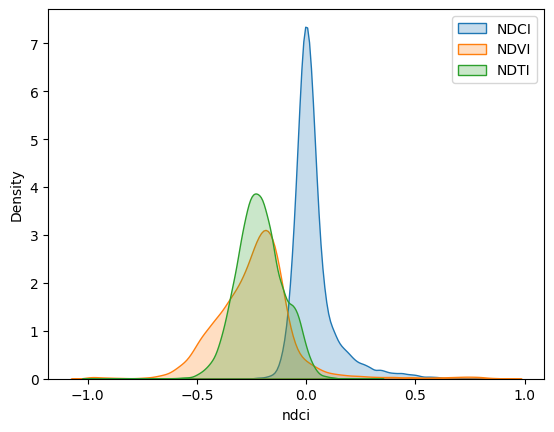

In [11]:
# Density plots
sns.kdeplot(df['ndci'], label='NDCI', fill=True)
sns.kdeplot(df['ndvi'], label='NDVI', fill=True)
sns.kdeplot(df['ndti'], label='NDTI', fill=True)
plt.legend()
plt.show()


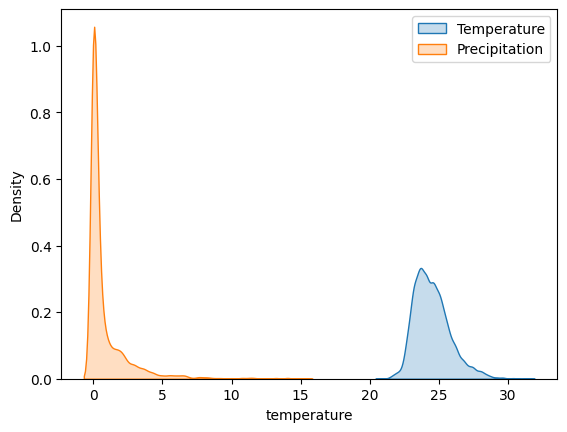

In [12]:
# Density plots For Temperature and Precipitation
sns.kdeplot(df['temperature'], label='Temperature', fill=True)
sns.kdeplot(df['precipitation'], label='Precipitation', fill=True)
plt.legend()
plt.show()


# **Boxplots**
To identify outliers and understand the spread of data across different variables.

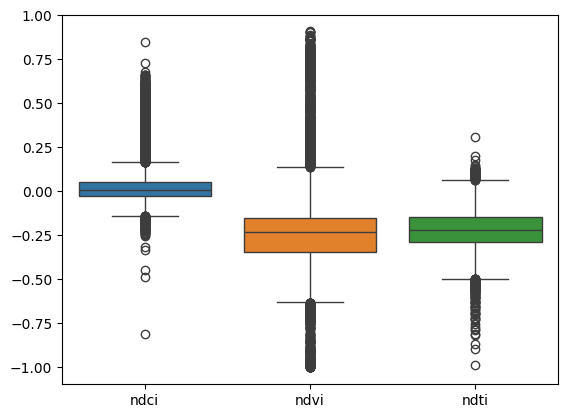

In [13]:
# Boxplot for NDCI, NDVI, and NDTI
sns.boxplot(data=df[['ndci', 'ndvi', 'ndti']])
plt.show()


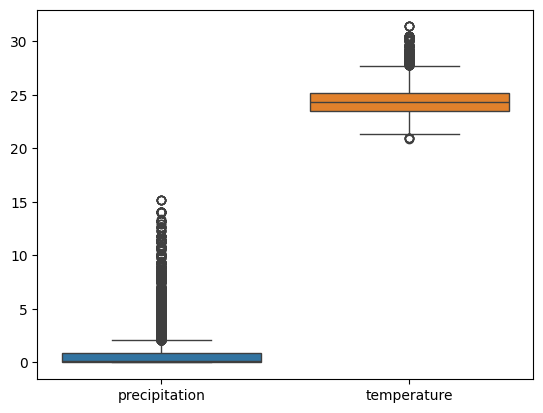

In [14]:
# Boxplot for Precipitation, and Temperature
sns.boxplot(data=df[['precipitation', 'temperature']])
plt.show()


**Univariate Analysis**

Analyze each variable separately.

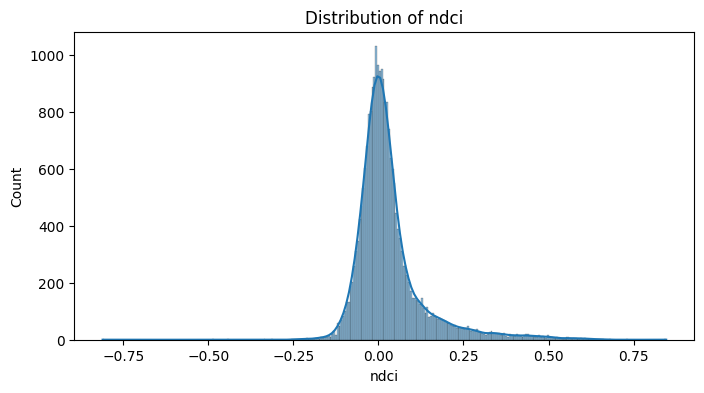

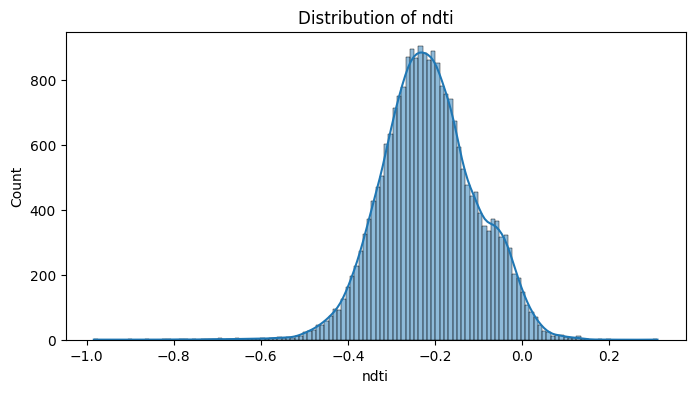

In [16]:
# Distribution plots for each numerical column
num_cols = ['ndci', 'ndti', 'ndvi', 'temperature', 'precipitation']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


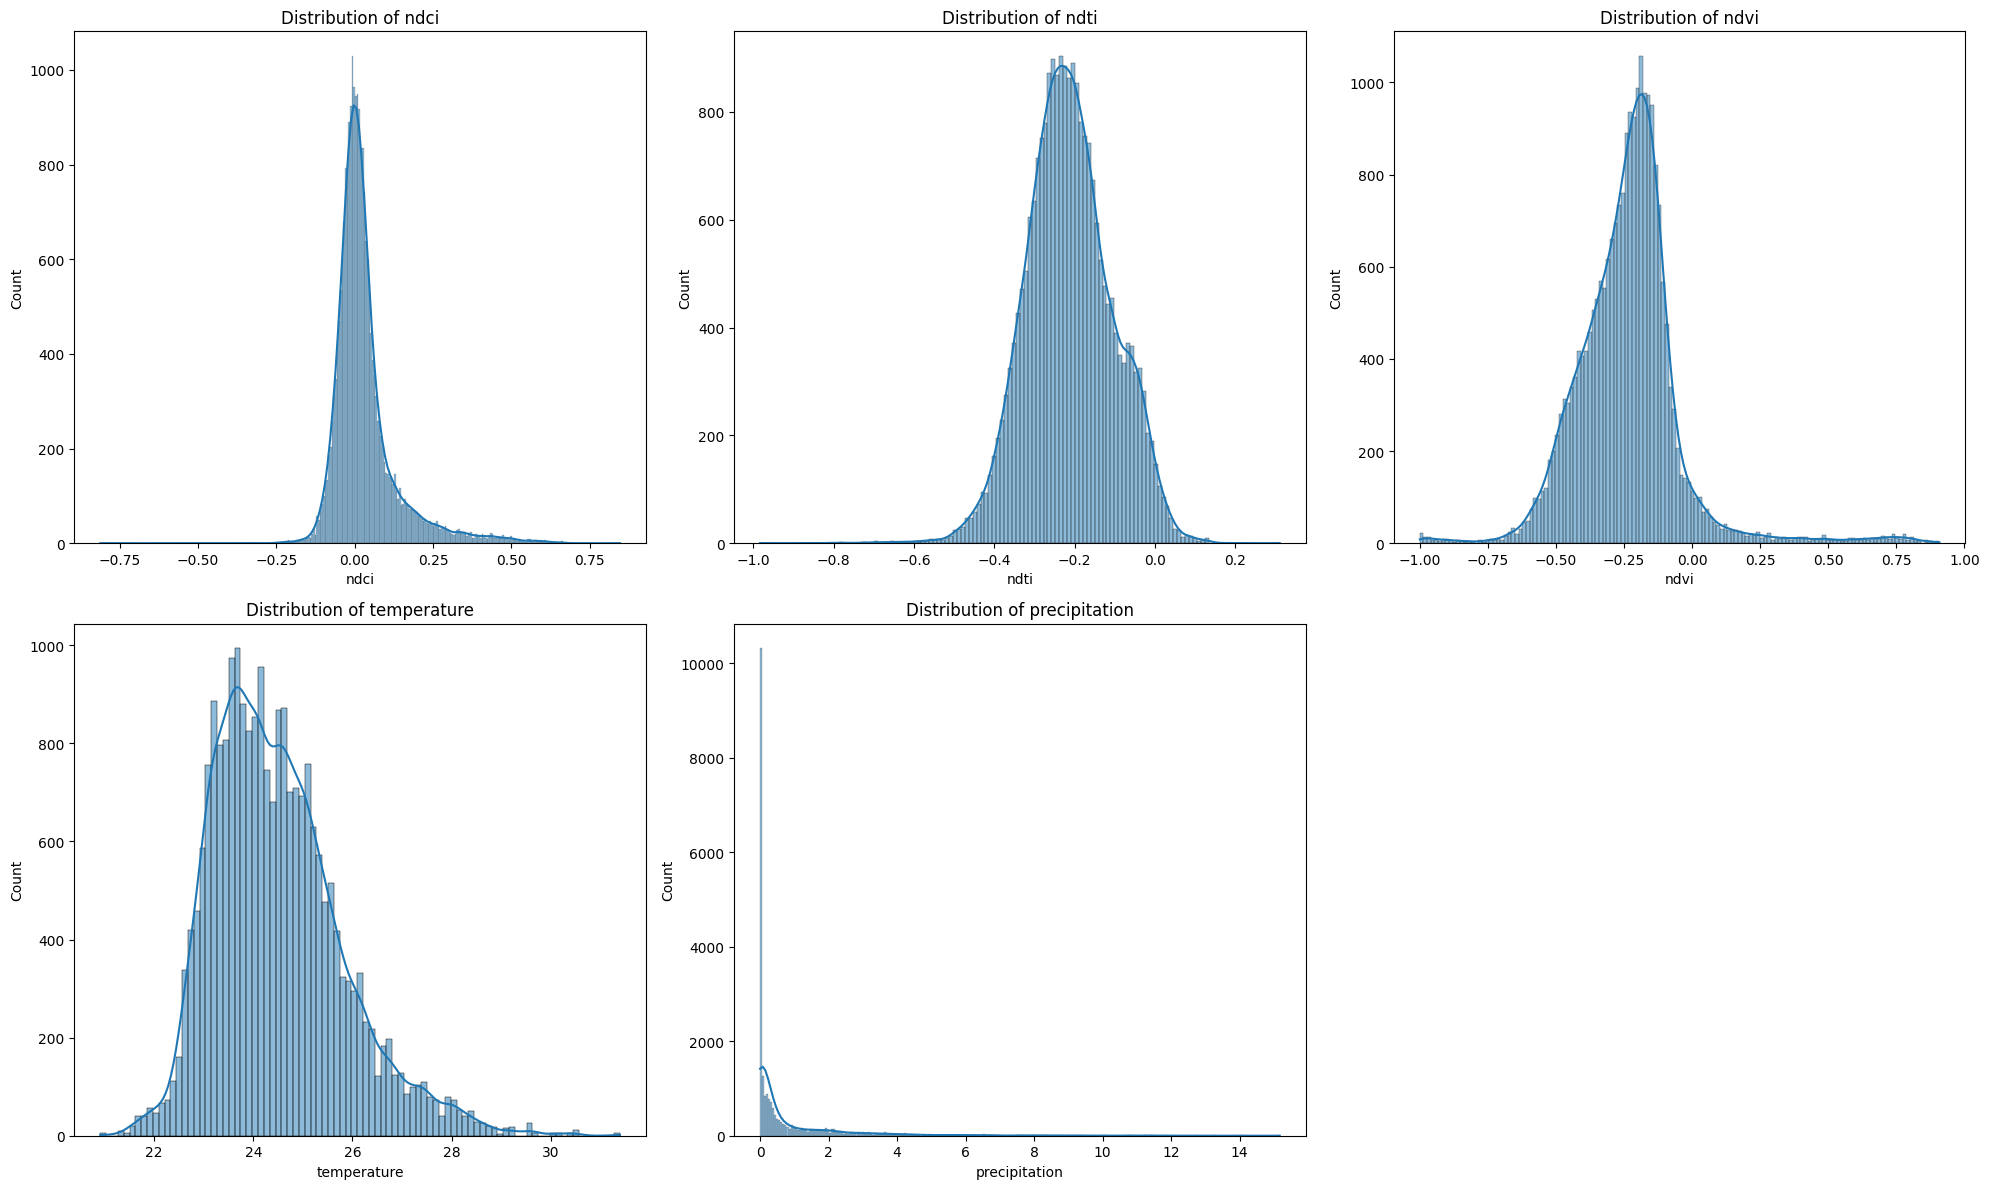

In [17]:
num_cols = ['ndci', 'ndti', 'ndvi', 'temperature', 'precipitation']

# Determine the number of columns and rows for the subplot grid
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 12))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

Analyze relationships between pairs of variables.

In [18]:
# Scatter plots for numerical pairs
sns.pairplot(df[num_cols], diag_kind=None)
plt.show()

In [20]:
# Generate the pairplot
g = sns.pairplot(df[num_cols], diag_kind=None)

# Define a list of colors for each column
colors = sns.color_palette("husl", len(num_cols))

# Loop through each axis in the pairplot
for i, ax in enumerate(g.axes.flatten()):
    if ax is not None:
        # Get the index for the row and column in the grid
        row_idx, col_idx = ax.get_subplotspec().rowspan.start, ax.get_subplotspec().colspan.start
        if row_idx != col_idx:  # Apply only to scatter plots, not the diagonal
            # Get the names of the features for the current subplot
            x_feature = df[num_cols].columns[col_idx]
            y_feature = df[num_cols].columns[row_idx]

            # Calculate the correlation coefficient
            corr_coef = np.corrcoef(df[x_feature], df[y_feature])[0, 1]

            # Plot the correlation coefficient on the scatter plot (left side)
            ax.annotate(f'corr: {corr_coef:.2f}', xy=(0.05, 0.9), xycoords='axes fraction',
                        ha='left', va='center', fontsize=9, color='black',
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

            # Get the scatter plot points
            for collection in ax.collections:
                collection.set_color(colors[col_idx])
                collection.set_edgecolor("white")  # Set white edge color

plt.show()


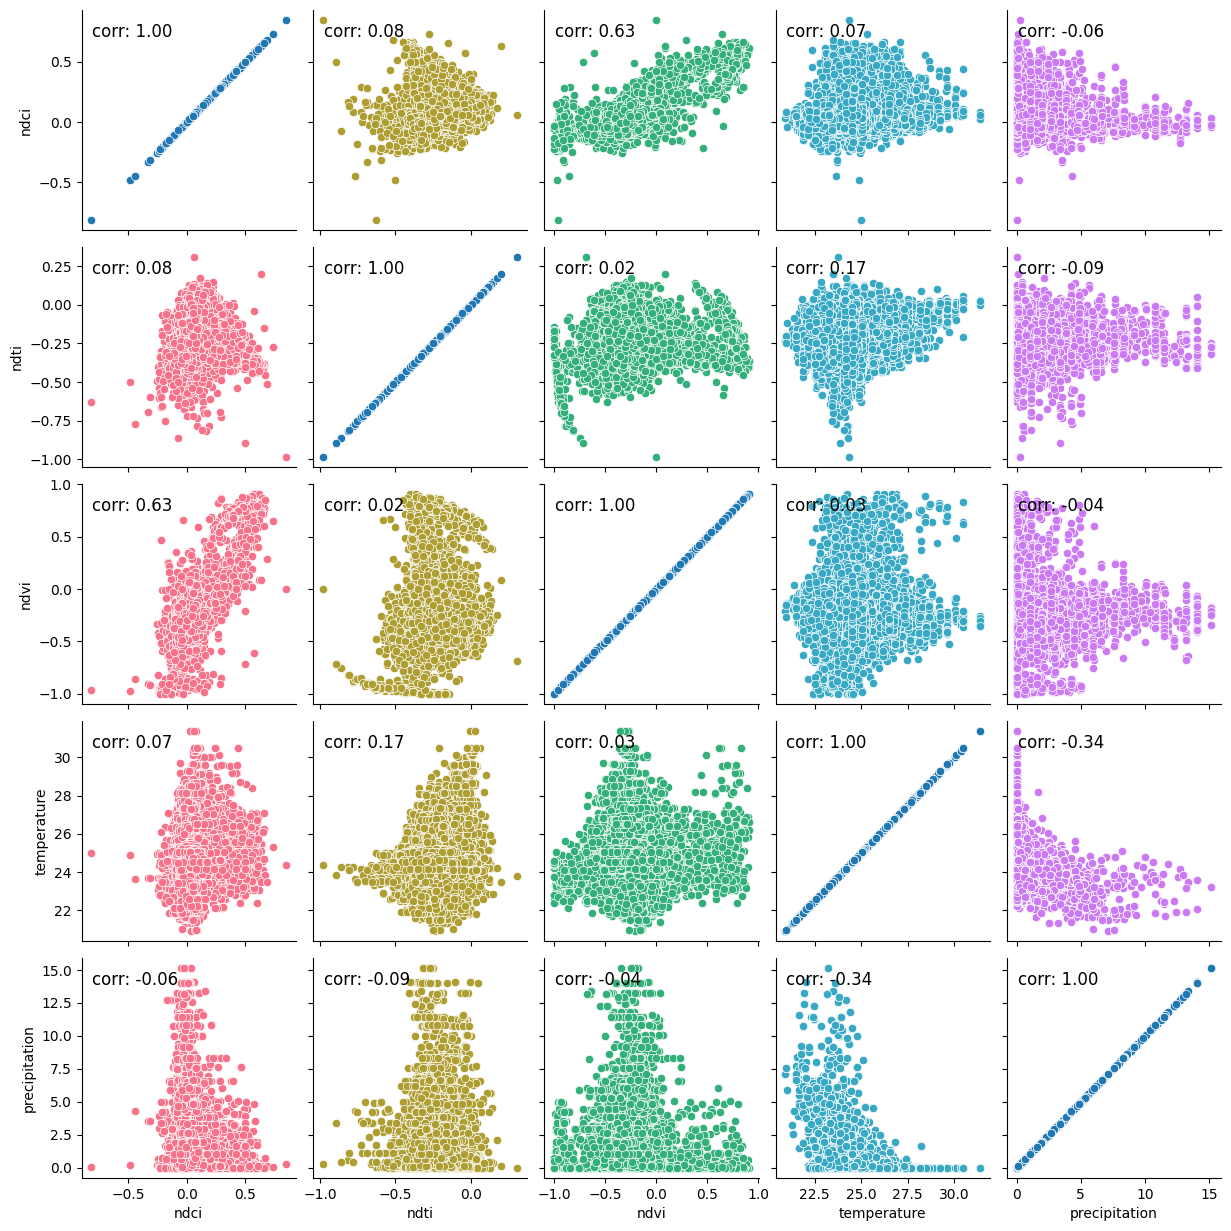

In [21]:
# Generate the pairplot
g = sns.pairplot(df[num_cols], diag_kind=None)

# Define a list of colors for each column
colors = sns.color_palette("husl", len(num_cols))

# Loop through each axis in the pairplot
for i, ax in enumerate(g.axes.flatten()):
    if ax is not None:
        # Get the index for the row and column in the grid
        row_idx, col_idx = ax.get_subplotspec().rowspan.start, ax.get_subplotspec().colspan.start

        # Determine the correlation coefficient
        if row_idx == col_idx:
            # Diagonal case: correlation of a variable with itself
            corr_coef = 1.0
        else:
            # Off-diagonal case: correlation between different variables
            x_feature = df[num_cols].columns[col_idx]
            y_feature = df[num_cols].columns[row_idx]
            corr_coef = np.corrcoef(df[x_feature], df[y_feature])[0, 1]

        # Plot the correlation coefficient on the plot
        ax.annotate(f'corr: {corr_coef:.2f}', xy=(0.05, 0.9), xycoords='axes fraction',
                    ha='left', va='center', fontsize=12, color='black')

        if row_idx != col_idx:  # Apply color only to scatter plots, not the diagonal
            for collection in ax.collections:
                collection.set_color(colors[col_idx])
                collection.set_edgecolor("white")  # Set white edge color

plt.show()


In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Time Series Analysis**

Analyze trends over time. Exploring temporal trends in the data, visualizing how variables such as NDCI and temperature change over time.

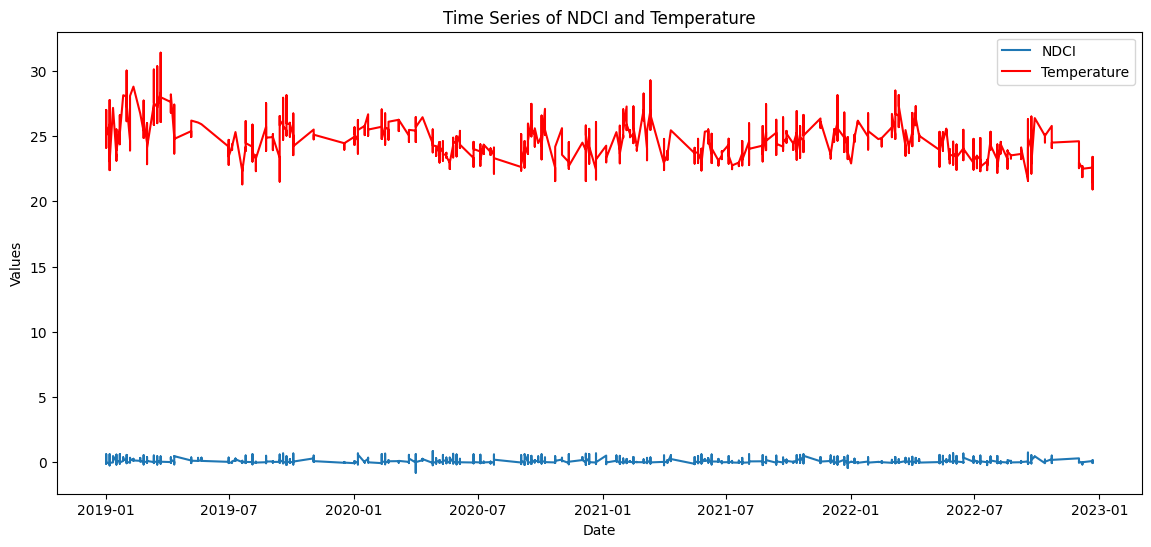

In [22]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot time series of NDCI and Temperature
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['ndci'], label='NDCI')
plt.plot(df['date'], df['temperature'], label='Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of NDCI and Temperature')
plt.legend()
plt.show()


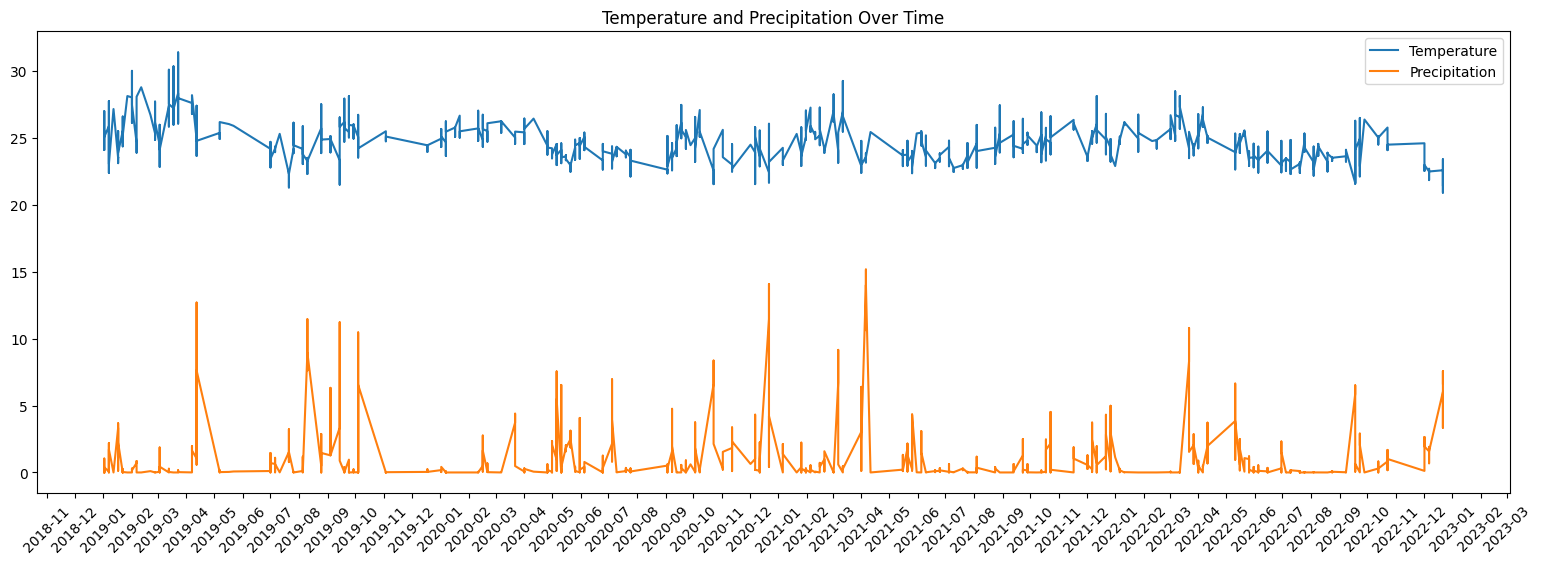

In [23]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot time series for selected variables
plt.figure(figsize=(19, 6))
plt.plot(df['date'], df['temperature'], label='Temperature')
plt.plot(df['date'], df['precipitation'], label='Precipitation')
plt.title('Temperature and Precipitation Over Time')
plt.legend()

# Format x-axis to show dates monthly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Slant the x-axis labels
plt.xticks(rotation=45)

plt.show()


In [24]:
# Combine date and time into a single datetime column
df_time_series = df.copy()  # Create a copy of the original DataFrame
df_time_series['datetime'] = pd.to_datetime(df_time_series['date'].astype(str) +' ' + df_time_series['time'].astype(str))

# Set the datetime column as the index
df_time_series.set_index('datetime', inplace=True)

# Drop the now redundant date and time columns
df_time_series.drop(columns=['date', 'time'], inplace=True)

# Display the modified dataframe to check the changes
df_time_series.head()


id      ndci      ndti      ndvi  temperature  \
datetime                                                             
2019-01-02 08:10:26   0  0.101512 -0.427785 -0.280000    25.474069   
2019-01-02 08:10:26   1  0.166667 -0.361446 -0.258907    25.474069   
2019-01-02 08:10:26   2  0.053957 -0.414905 -0.335025    25.351022   
2019-01-02 08:10:26   3 -0.028939 -0.320595 -0.221374    25.351022   
2019-01-02 08:10:26   4  0.062706 -0.336449 -0.193277    25.351022   

                     precipitation  longitude  latitude  
datetime                                                 
2019-01-02 08:10:26       0.004637  33.950132 -0.991945  
2019-01-02 08:10:26       0.004637  33.958209 -0.952864  
2019-01-02 08:10:26       0.023651  33.961437 -0.925996  
2019-01-02 08:10:26       0.023651  33.985340 -0.923366  
2019-01-02 08:10:26       0.023651  33.969162 -0.914868

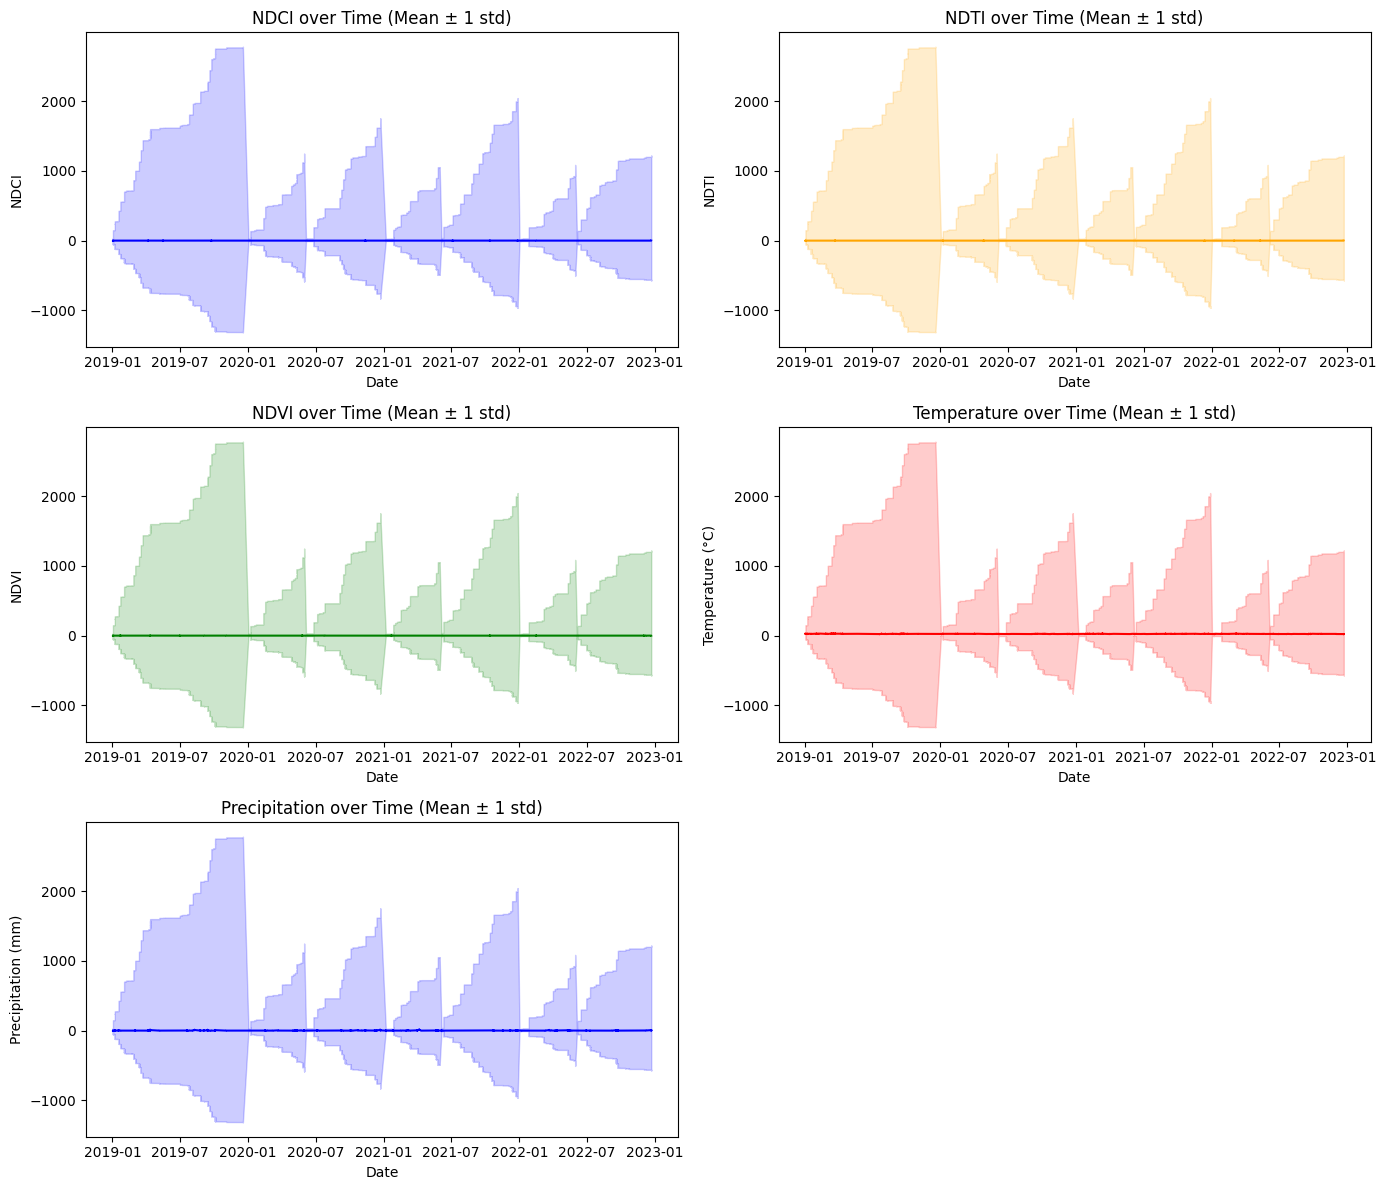

In [25]:
# Convert index to datetime if necessary
df_time_series.index = pd.to_datetime(df_time_series.index)

# Calculate daily mean and standard deviation
daily_mean = df_time_series.mean(axis=1)
daily_std = df_time_series.std(axis=1)

# Plot the time series data with shaded regions for ±1 std
plt.figure(figsize=(14, 12))

# Plot ndci
plt.subplot(3, 2, 1)
plt.plot(df_time_series.index, df_time_series['ndci'], label='NDCI', color='blue')
plt.fill_between(df_time_series.index, daily_mean - daily_std, daily_mean + daily_std, color='blue', alpha=0.2)
plt.title('NDCI over Time (Mean ± 1 std)')
plt.xlabel('Date')
plt.ylabel('NDCI')

# Plot ndti
plt.subplot(3, 2, 2)
plt.plot(df_time_series.index, df_time_series['ndti'], label='NDTI', color='orange')
plt.fill_between(df_time_series.index, daily_mean - daily_std, daily_mean + daily_std, color='orange', alpha=0.2)
plt.title('NDTI over Time (Mean ± 1 std)')
plt.xlabel('Date')
plt.ylabel('NDTI')

# Plot ndvi
plt.subplot(3, 2, 3)
plt.plot(df_time_series.index, df_time_series['ndvi'], label='NDVI', color='green')
plt.fill_between(df_time_series.index, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.2)
plt.title('NDVI over Time (Mean ± 1 std)')
plt.xlabel('Date')
plt.ylabel('NDVI')

# Plot temperature
plt.subplot(3, 2, 4)
plt.plot(df_time_series.index, df_time_series['temperature'], label='Temperature', color='red')
plt.fill_between(df_time_series.index, daily_mean - daily_std, daily_mean + daily_std, color='red', alpha=0.2)
plt.title('Temperature over Time (Mean ± 1 std)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot precipitation
plt.subplot(3, 2, 5)
plt.plot(df_time_series.index, df_time_series['precipitation'], label='Precipitation', color='blue')
plt.fill_between(df_time_series.index, daily_mean - daily_std, daily_mean + daily_std, color='blue', alpha=0.2)
plt.title('Precipitation over Time (Mean ± 1 std)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()


In [26]:
df.set_index('date', inplace=True)
df['ndci'].plot(figsize=(15, 5), title='NDCI Over Time')
plt.xlabel('Date')
plt.ylabel('NDCI')
plt.show()


# **Scale Down Standard Deviation**

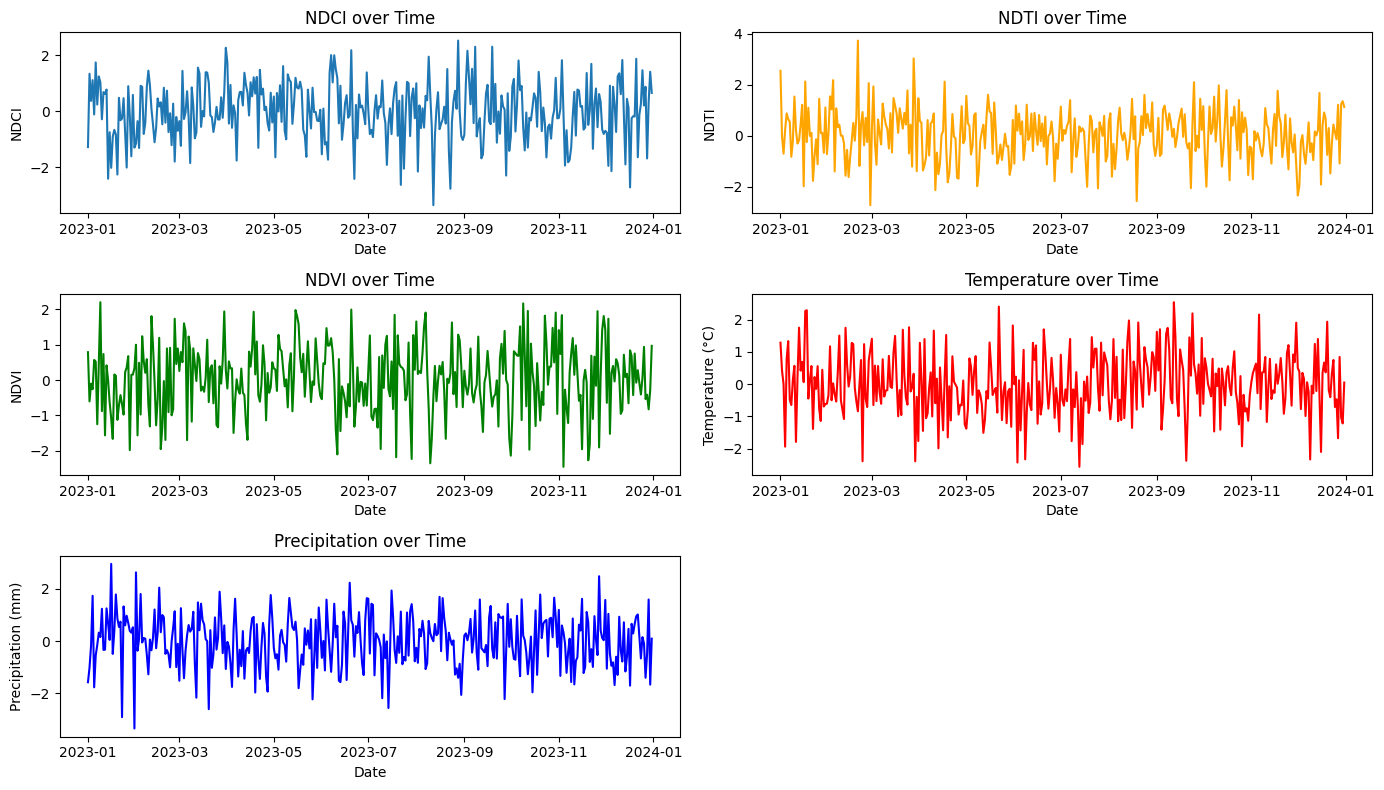

In [30]:
# Plot the time series data
plt.figure(figsize=(14, 8))

# Plot ndci
plt.subplot(3, 2, 1)
plt.plot(df_time_series.index, df_time_series['ndci'], label='NDCI')
plt.title('NDCI over Time')
plt.xlabel('Date')
plt.ylabel('NDCI')

# Plot ndti
plt.subplot(3, 2, 2)
plt.plot(df_time_series.index, df_time_series['ndti'], label='NDTI', color='orange')
plt.title('NDTI over Time')
plt.xlabel('Date')
plt.ylabel('NDTI')

# Plot ndvi
plt.subplot(3, 2, 3)
plt.plot(df_time_series.index, df_time_series['ndvi'], label='NDVI', color='green')
plt.title('NDVI over Time')
plt.xlabel('Date')
plt.ylabel('NDVI')

# Plot temperature
plt.subplot(3, 2, 4)
plt.plot(df_time_series.index, df_time_series['temperature'], label='Temperature', color='red')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Plot precipitation
plt.subplot(3, 2, 5)
plt.plot(df_time_series.index, df_time_series['precipitation'], label='Precipitation', color='blue')
plt.title('Precipitation over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()


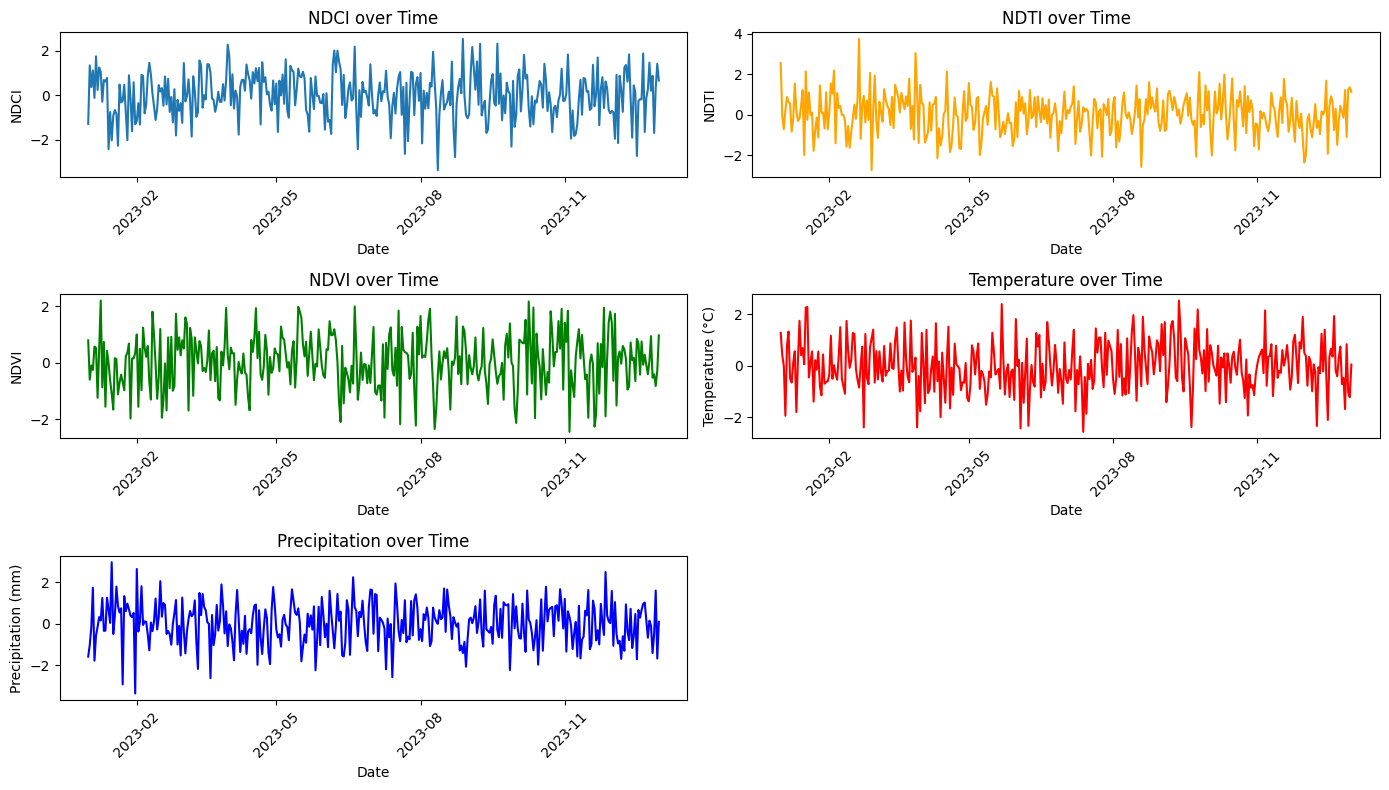

In [31]:
# Plot the time series data
plt.figure(figsize=(14, 8))

# Create a MonthLocator with a 3-month interval
three_months = mdates.MonthLocator(interval=3)
date_format = mdates.DateFormatter('%Y-%m')

# Plot ndci
plt.subplot(3, 2, 1)
plt.plot(df_time_series.index, df_time_series['ndci'], label='NDCI')
plt.title('NDCI over Time')
plt.xlabel('Date')
plt.ylabel('NDCI')
plt.gca().xaxis.set_major_locator(three_months)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Plot ndti
plt.subplot(3, 2, 2)
plt.plot(df_time_series.index, df_time_series['ndti'], label='NDTI', color='orange')
plt.title('NDTI over Time')
plt.xlabel('Date')
plt.ylabel('NDTI')
plt.gca().xaxis.set_major_locator(three_months)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Plot ndvi
plt.subplot(3, 2, 3)
plt.plot(df_time_series.index, df_time_series['ndvi'], label='NDVI', color='green')
plt.title('NDVI over Time')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.gca().xaxis.set_major_locator(three_months)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Plot temperature
plt.subplot(3, 2, 4)
plt.plot(df_time_series.index, df_time_series['temperature'], label='Temperature', color='red')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.gca().xaxis.set_major_locator(three_months)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Plot precipitation
plt.subplot(3, 2, 5)
plt.plot(df_time_series.index, df_time_series['precipitation'], label='Precipitation', color='blue')
plt.title('Precipitation over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.gca().xaxis.set_major_locator(three_months)
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# **Seasonal Decomposition**
Applied decomposition techniques to separate trend, seasonality, and residual components.

In [32]:
result = seasonal_decompose(df['ndci'], model='additive', period=365)
result.plot()
plt.show()


**Decomposition of Time Series**

Decompose the time series into trend, seasonal, and residual components to better understand its structure.

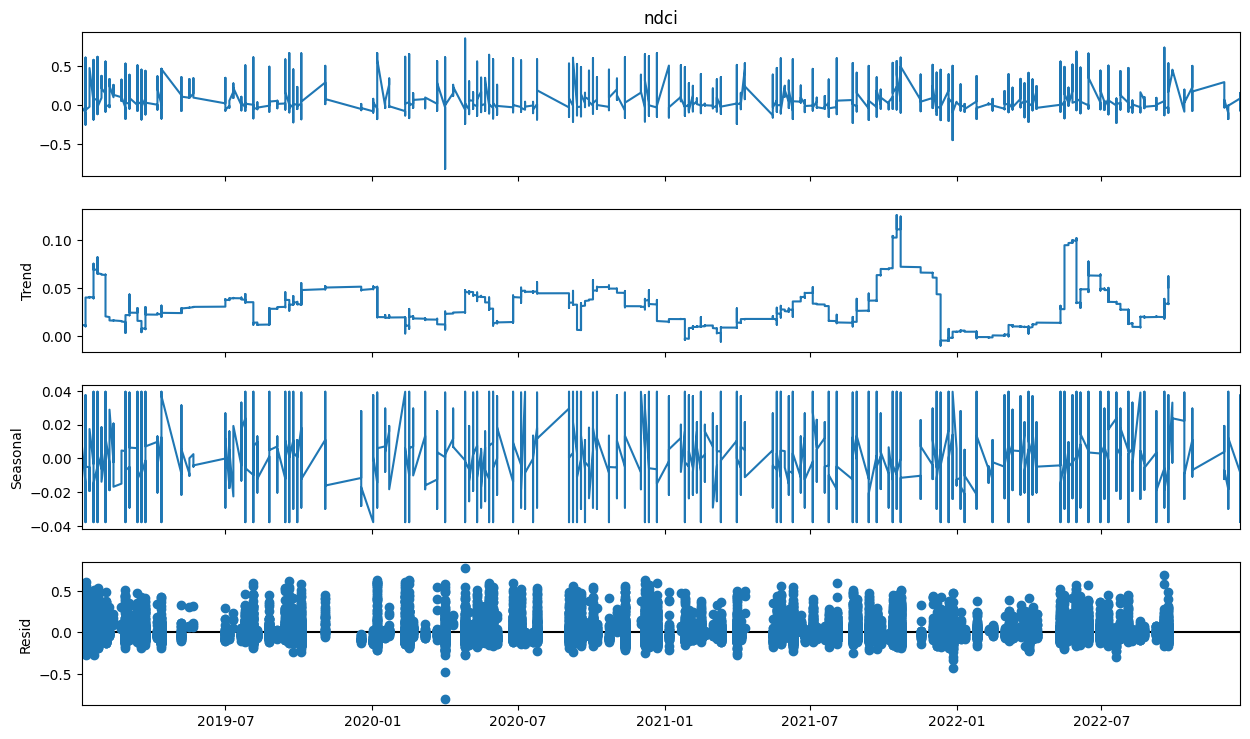

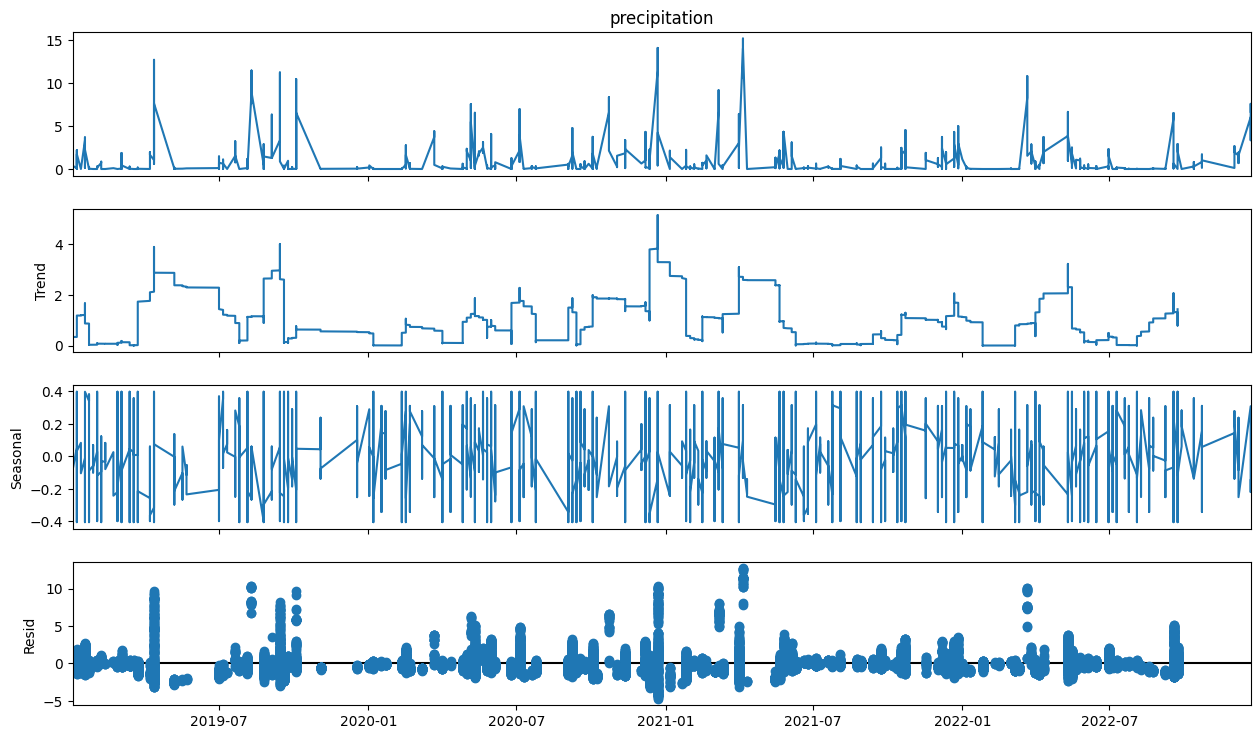

In [33]:

# Decompose NDCI
decomposition = seasonal_decompose(df['ndci'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# Decompose NDTI
decomposition = seasonal_decompose(df['ndti'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# Decompose NDVI
decomposition = seasonal_decompose(df['ndvi'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# Decompose Temperature
decomposition = seasonal_decompose(df['temperature'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# Decompose Precipitation
decomposition = seasonal_decompose(df['precipitation'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()



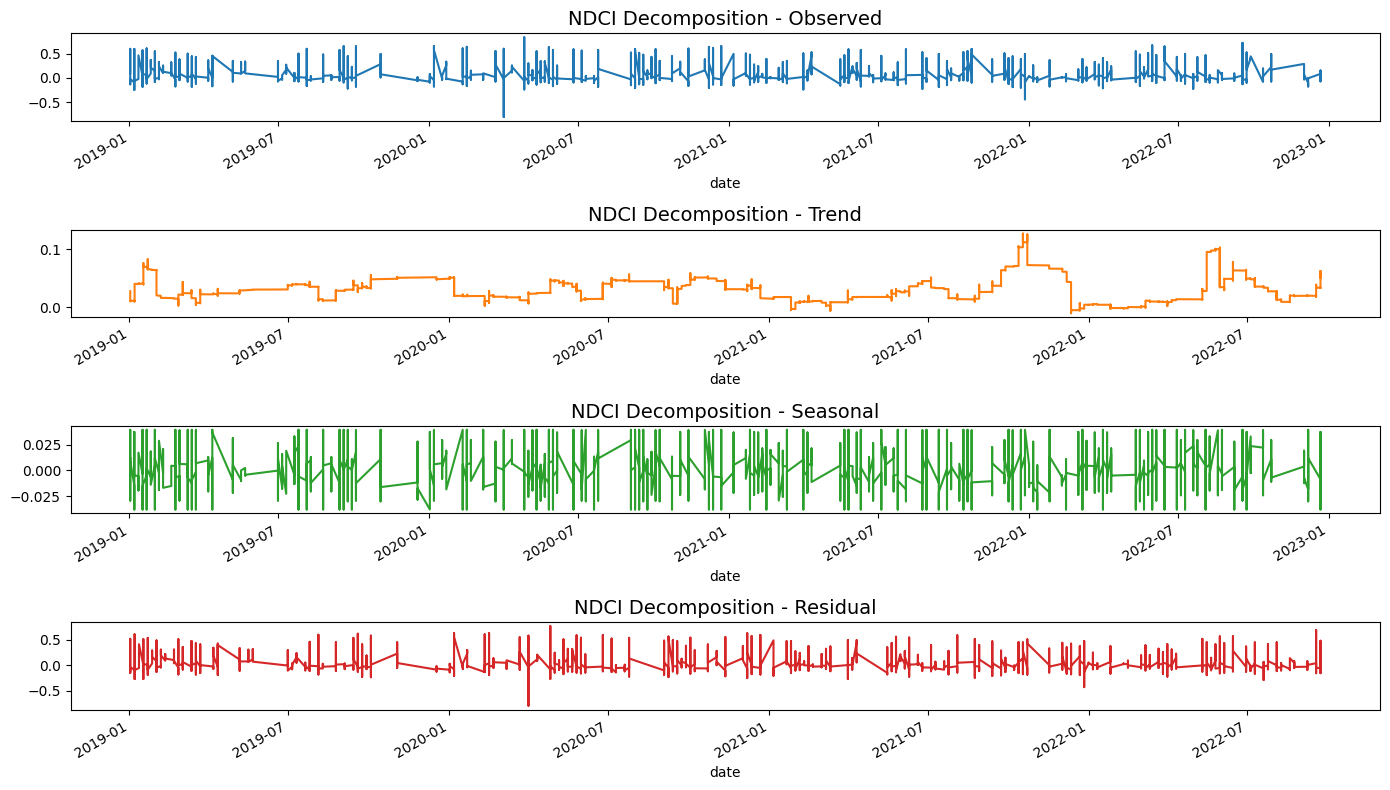

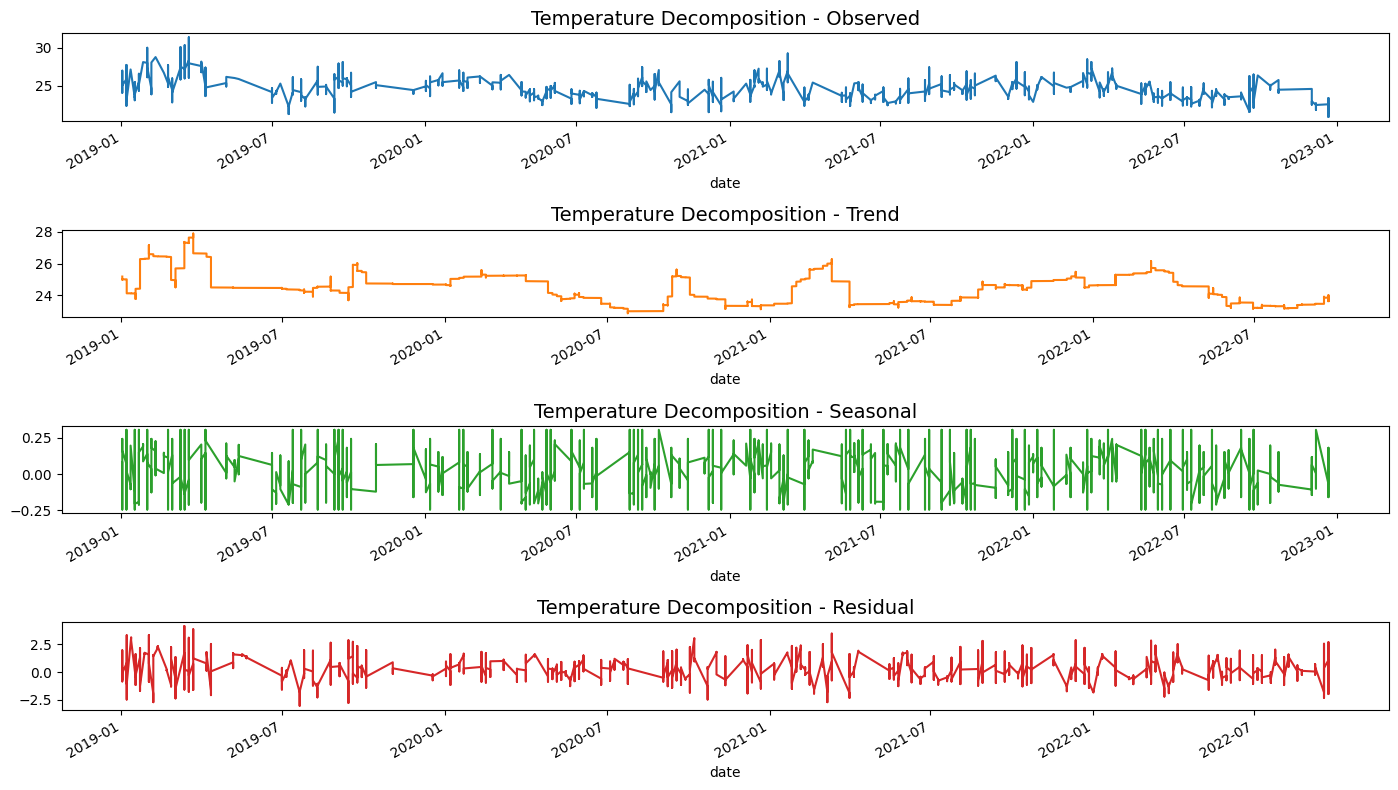

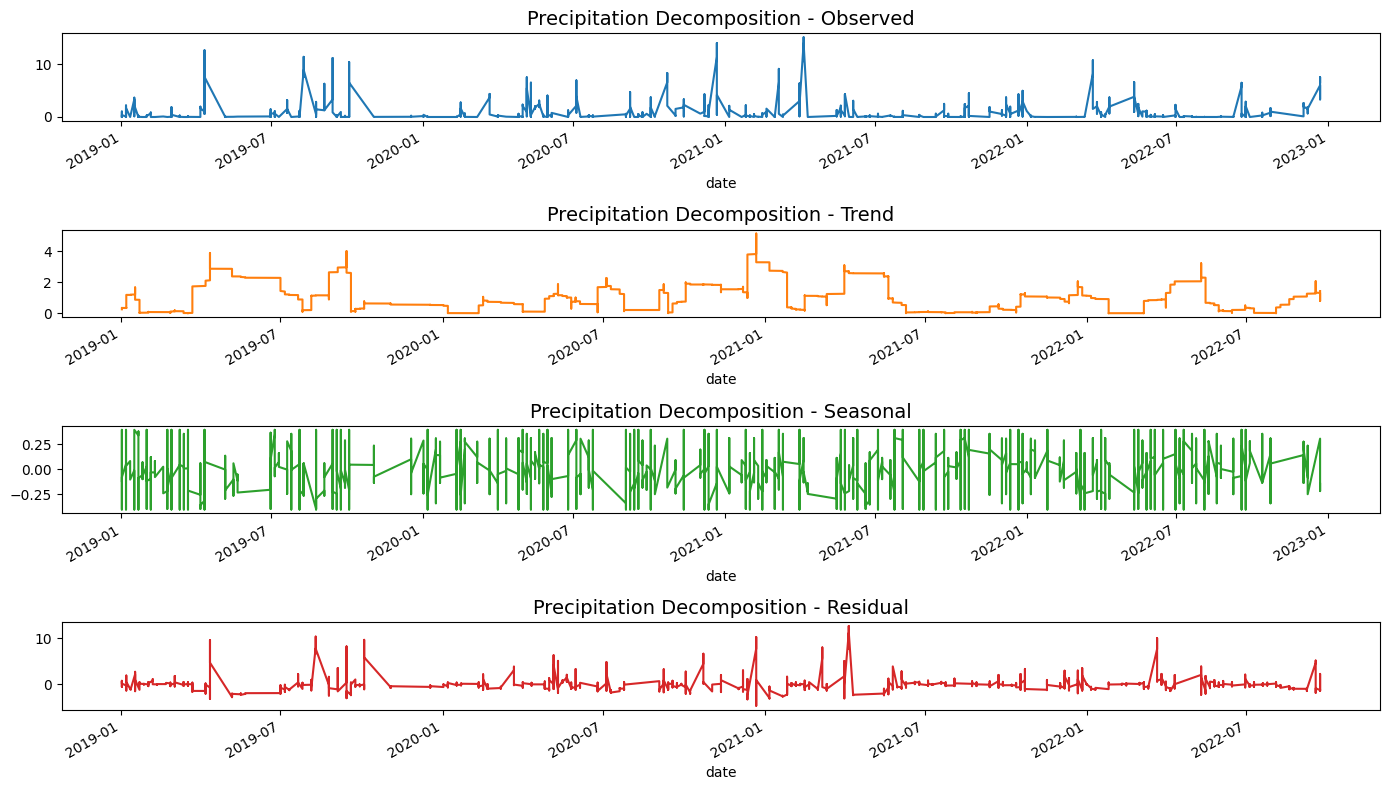

In [40]:
# Define a function to plot with custom colors
def plot_decomposition(decomposition, colors, title):
    fig, axes = plt.subplots(4, 1, figsize=(14, 8))
    decomposition.observed.plot(ax=axes[0], color=colors[0])
    decomposition.trend.plot(ax=axes[1], color=colors[1])
    decomposition.seasonal.plot(ax=axes[2], color=colors[2])
    decomposition.resid.plot(ax=axes[3], color=colors[3])

    # Set titles for each subplot
    axes[0].set_title(f'{title} - Observed', fontsize=14)
    axes[1].set_title(f'{title} - Trend', fontsize=14)
    axes[2].set_title(f'{title} - Seasonal', fontsize=14)
    axes[3].set_title(f'{title} - Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

# Colors for different components: [Observed, Trend, Seasonal, Residual]
colors_ndci = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors_ndti = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors_ndvi = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors_temp = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors_precip = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# colors_ndti = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
# colors_ndvi = ['#bcbd22', '#17becf', '#ff9896', '#98df8a']
# colors_temp = ['#ffbb78', '#c5b0d5', '#aec7e8', '#ff9896']
# colors_precip = ['#f7b6d2', '#c49c94', '#dbdb8d', '#9edae5']

# Decompose NDCI
decomposition_ndci = seasonal_decompose(df['ndci'], model='additive', period=365)
plot_decomposition(decomposition_ndci, colors_ndci, 'NDCI Decomposition')

# Decompose NDTI
decomposition_ndti = seasonal_decompose(df['ndti'], model='additive', period=365)
plot_decomposition(decomposition_ndti, colors_ndti, 'NDTI Decomposition')

# Decompose NDVI
decomposition_ndvi = seasonal_decompose(df['ndvi'], model='additive', period=365)
plot_decomposition(decomposition_ndvi, colors_ndvi, 'NDVI Decomposition')

# Decompose Temperature
decomposition_temp = seasonal_decompose(df['temperature'], model='additive', period=365)
plot_decomposition(decomposition_temp, colors_temp, 'Temperature Decomposition')

# Decompose Precipitation
decomposition_precip = seasonal_decompose(df['precipitation'], model='additive', period=365)
plot_decomposition(decomposition_precip, colors_precip, 'Precipitation Decomposition')


**Geospatial Analysis**

If relevant, visualize data based on geographical coordinates.

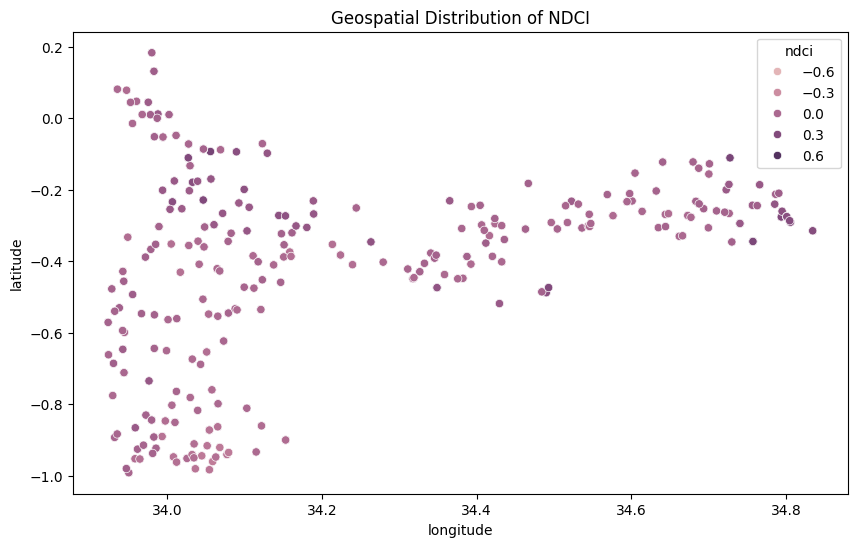

In [35]:
# Scatter plot with latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='ndci', data=df)
plt.title('Geospatial Distribution of NDCI')
plt.show()


In [37]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

gdf.plot(column='ndci', cmap='viridis', figsize=(10, 8), legend=True)
plt.title('Spatial Distribution of NDCI')
plt.show()


In [ ]:

# Compare model performances
models = ['Neural Network', 'Random Forest', 'XGBoost', 'SVR', 'KNN', 'Decision Tree']
predictions = [nn_pred, rf_pred, xgb_pred, svr_pred, knn_pred, dt_pred]

plt.figure(figsize=(12, 6))
for i, (model, pred) in enumerate(zip(models, predictions)):
    plt.scatter(y_test, pred, label=model, alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Models')
plt.legend()
plt.show()